In [1]:
from astropy.io import fits
from glob import glob
import numpy as np
from skimage.registration import phase_cross_correlation
import scipy.optimize as opt
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

### Collate data

In [2]:
# keep only H persei sequence images
file_names = glob('/Users/chris/Desktop/uf_grad_school/obs_tech/photometry_lab/2020-10-31/HD209458.2020-10-31T22*.fits')
images = []
for i in range(len(file_names)):
    images.append(fits.getdata(np.sort(file_names)[i]))

In [3]:
im_array = np.array(images)
im_array.shape

(738, 844, 1117)

In [4]:
# same with flat frames
file_names_flats = glob('/Users/chris/Desktop/uf_grad_school/obs_tech/photometry_lab/2020-10-31/HD209458_flats*.fits')
images_flats = []
for i in range(len(file_names_flats)):
    images_flats.append(fits.getdata(np.sort(file_names_flats)[i]))
im_array_flats = np.array(images_flats)
print(im_array_flats.shape)

(20, 844, 1117)


In [7]:
fits.getheader(np.sort(file_names)[12])

 [astropy.io.fits.verify]


SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 1117 / length of data axis 1                          
NAXIS2  =                  844 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
INSTRUME= 'SBIG CCD'           / CCD Name                                       
TELESCOP= 'Telescope Simulator' / Telescope name                                
OBSERVER= 'GROUP 3 '           / Observer name                                  
OBJECT  = 'HD209458'           / Object name                                    
EXPTIME =         2.000000E+

[[13545.  13640.5 13613.5 ...  9870.   9956.   9870.5]
 [13569.5 13643.5 13550.5 ...  9764.   9821.   9843. ]
 [13582.  13613.5 13416.  ...  9733.5  9907.5  9993. ]
 ...
 [15901.5 16058.  15930.5 ... 12807.5 13007.5 12852.5]
 [15869.5 15831.5 15987.5 ... 13000.  12987.5 12965.5]
 [16044.  15945.5 15777.  ... 12826.5 12952.5 13024.5]]


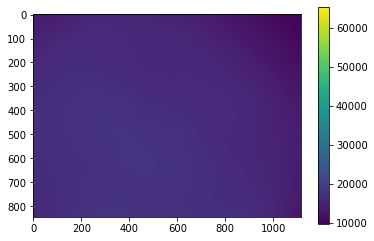

In [5]:
# median-combine flat field frames
flat_vis = np.median(1.0*im_array_flats, axis=0)
print(flat_vis)
plt.imshow(flat_vis)
plt.colorbar()
plt.show()

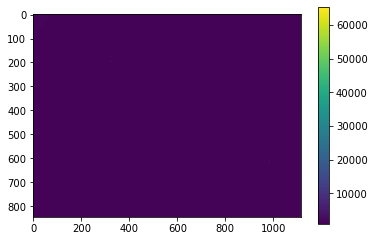

In [7]:
chunk = im_array[0:100]
plt.imshow(np.median(1.0*chunk, axis=0))
plt.colorbar()
plt.show()

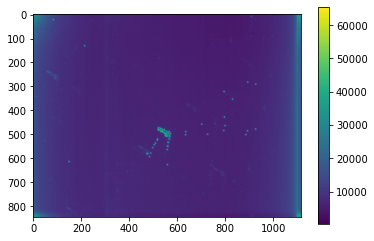

In [10]:
def stack_shift_median(file_names): # new
    images = []
    og = imageio.imread(np.sort(file_names)[0])
    for i in range(len(file_names)):
        image = imageio.imread(np.sort(file_names)[i])
        # calculate shift for each image relative to first
        pcc = phase_cross_correlation(og, image)
        # apply shift
        images.append(np.roll(image, [int(shift) for shift in pcc[0]], axis=(0,1)))
    return np.median(np.array(np.stack(images)), axis=0)


og = chunk[0]
for i in range(len(chunk)):
    # calculate shift for each image relative to first
    pcc = phase_cross_correlation(og, chunk[i])
    #print(pcc[0])
    # apply shift; list comprehension is bc PCC outputs floats, not ints
    og += np.roll(chunk[i], [int(shift) for shift in pcc[0]], axis=(0,1))
    
plt.imshow(og)
plt.colorbar()
#plt.ylim([600, 550]) # to keep things oriented the same as full CCD image
#plt.xlim([900, 950])
plt.show()